# Домашнее задание 2. Кластеризация векторного пространства

In [153]:
import wget
import zipfile
import gensim
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as hcluster

from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from typing import List, Dict

In [2]:
wget.download("https://raw.githubusercontent.com/dashapopova/CompSem2023/main/HW/HW2_igrat'.txt", 'play.txt')

'play.txt'

In [85]:
words: List[str] = []
with open('play.txt', 'r', encoding='utf-8') as file_play:
    for line in file_play:
        words.append(line.split()[0].split('_')[1] + '_NOUN')
    words.append(line.split()[0].split('_')[0] + '_VERB')

### **Пункт №1** - 0.5 балла

Взять любую предобученную векторную модель с rusvectores.org и извлечь оттуда вектор для глагола и каждого существительного из списка.

In [4]:
model_url = 'http://vectors.nlpl.eu/repository/20/220.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]

In [80]:
vectors: Dict[str, np.ndarray] = {}

with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.txt')
    for line in stream:
        line = line.decode()
        if line.split()[0] in words:
            vectors[line.split()[0]] = np.float_(line.split()[1:])

In [81]:
verb = vectors['играть_VERB']

### **Пункт №2** - 0.5 балла

На основе этих векторов построить репрезентацию для каждой пары «глагол + существительное» с помощью простой аддитивной модели композиции.
> Примечание. Если каждый вектор – это объект типа array в модуле numpy, то можно просто сложить эти два объекта, используя оператор «+».

In [87]:
vector_summary: Dict[str, np.ndarray] = {}
for vector in vectors:
    if vector != 'играть_VERB':
        vector_summary['играть_' + vector.split('_')[0]] = verb + vectors[vector]

In [88]:
names = list(vector_summary.keys())

In [118]:
X = np.array(list(vector_summary.values()))

In [90]:
def return_clusters(cl, n=names):
    clstrs: Dict[int, List[str]] = {}
    for i in zip(cl, n):
        if i[0] not in clstrs:
            clstrs[i[0]] = [i[1]]
        else:
            clstrs[i[0]].append(i[1])
    return dict(sorted(clstrs.items()))

### **Пункт №3 (а)** - 2 балла (по одному за метод и по одному за обоснование выбора порогового значения для иерархической кластеризации)

Собрать все векторные представления пар в единую матрицу и кластеризовать их методом иерархической кластеризации.

Количество кластеров определяется автоматически (но задается значение порога t).
Возьмите то значение параметра, которое вам кажется наиболее удачным и обоснуйте свое решение (одного-двух предложений будет вполне достаточно).
Все остальные параметры в обоих случаях можно не менять и использовать настройки по умолчанию.

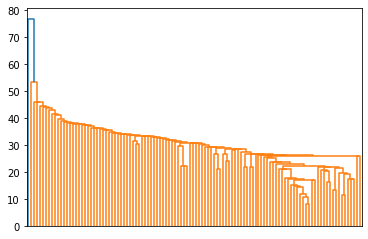

In [161]:
Z = hcluster.linkage(X)
plt.figure()
dn = hcluster.dendrogram(Z, no_labels=True)
plt.show()

In [91]:
clusters = hcluster.fcluster(Z, 0.8)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 74


Если взять число большее или равное 1, кластеров будет 17-. Иначе кластеров будет 74+. Хотелось бы, конечно, какого-то промежуточного варианта, но его, к сожалению, нет. 

Почему я выбрала второй вариант? При 74-ех кластерах (и значении порога: `t = 0.8-0.99`) у нас есть четкие группы из нескольких элементов: *играть* + время (3), *играть* + световые обозначения (2), *играть* + кино- и театральные реалии (4, 5) и т.д.. Остальные элементы же разводятся в отдельные моногруппы (группы, состоящие из одного элемента).

При 17-и кластерах же все эти группки, существовашие при 74-ех кластерах, сгребаются в одну супергруппу (2), что, кажется, совсем не отражает их семантику. Плюс к этому остаются все те же моногруппы.

In [93]:
return_clusters(clusters)

{1: ['играть_процесс', 'играть_фактор'],
 2: ['играть_свет', 'играть_солнце', 'играть_луч'],
 3: ['играть_день', 'играть_ночь', 'играть_вечер', 'играть_утро'],
 4: ['играть_актер', 'играть_актриса', 'играть_артист'],
 5: ['играть_пьеса', 'играть_спектакль', 'играть_комедия'],
 6: ['играть_улыбка', 'играть_румянец'],
 7: ['играть_женщина', 'играть_мужчина'],
 8: ['играть_кукла', 'играть_игрушка'],
 9: ['играть_дитя',
  'играть_спартак',
  'играть_трубач',
  'играть_гамлет',
  'играть_гармонь',
  'играть_патефон',
  'играть_шарманка',
  'играть_прятки',
  'играть_моцарт',
  'играть_россия',
  'играть_мольер',
  'играть_молчанка',
  'играть_шопен'],
 10: ['играть_отец',
  'играть_жена',
  'играть_мать',
  'играть_дочь',
  'играть_девушка',
  'играть_мальчик',
  'играть_девочка',
  'играть_старик',
  'играть_мама',
  'играть_ребята',
  'играть_старуха',
  'играть_мальчишка',
  'играть_ребятишки'],
 11: ['играть_скрипка'],
 12: ['играть_вальс'],
 13: ['играть_брат'],
 14: ['играть_трагедия'

### **Пункт №3 (b)** - 2 балла (по одному за метод и по одному за обоснование выбора числа кластеров для метода К-средних)

Собрать все векторные представления пар в единую матрицу и кластеризовать их методом К-средних, см. [хендаут](https://github.com/dashapopova/CompSem2022/blob/main/CompSemClustering.ipynb).

Количество кластеров определяется автоматически (но задается значение порога t).
Возьмите то значение параметра, которое вам кажется наиболее удачным и обоснуйте свое решение (одного-двух предложений будет вполне достаточно).
Все остальные параметры в обоих случаях можно не менять и использовать настройки по умолчанию.

In [166]:
kmeans = KMeans(n_clusters=23).fit(X)

Оптимальным кол-вом кластеров мне показалось число 20-25, так как, с одной стороны, групп недостаточно много, чтобы они начали выделяться в отдельные моногруппы (см. проблему иерархической модели), но, с другой стороны достаточно, чтобы избежать супергрупп - больших групп состоящих из разрозненных элементов (видимо, выделенных по остаточному признаку). 

Я остановилась на числе 23, так как при 25-и кластерах большее число слов отходило в моногруппы, а некоторые правильные группы переходили в супергруппу (9) (т.е. увеличение кол-ва групп не помогало бороться с наличием супергруппы), а при 20-и кластерах также происходил переход некоторых правильных групп в супергруппу (9).

In [167]:
return_clusters(kmeans.labels_)

{0: ['играть_футбол',
  'играть_солдат',
  'играть_девушка',
  'играть_студент',
  'играть_мальчик',
  'играть_девочка',
  'играть_собака',
  'играть_мама',
  'играть_ребята',
  'играть_умение',
  'играть_мальчишка',
  'играть_ребятишки'],
 1: ['играть_время',
  'играть_слово',
  'играть_партия',
  'играть_мастер',
  'играть_танец',
  'играть_трагедия',
  'играть_шахматы',
  'играть_скрипка',
  'играть_теннис',
  'играть_марш',
  'играть_кукла',
  'играть_игрушка',
  'играть_гамма',
  'играть_песнь',
  'играть_вальс',
  'играть_спартак',
  'играть_трубач',
  'играть_гамлет',
  'играть_гармонь',
  'играть_патефон',
  'играть_шарманка',
  'играть_прятки',
  'играть_моцарт',
  'играть_россия',
  'играть_мольер',
  'играть_молчанка',
  'играть_шопен'],
 2: ['играть_роль', 'играть_комедия'],
 3: ['играть_ребенок',
  'играть_отец',
  'играть_брат',
  'играть_король',
  'играть_жена',
  'играть_мать',
  'играть_дочь',
  'играть_свадьба'],
 4: ['играть_жизнь',
  'играть_сила',
  'играть_глаз',

### **Пункт №4** - 1.5 балла (1 балл - определение центров, 0.5 балла - выбор трех элементов, наиболее к ним близких)

Для каждого кластера определите центр и выберите по три элемента, наиболее к нему близких (по метрике косинусной близости). Центр можно определить как среднее арифметическое среди всех элементов кластера по каждому измерению (например, с помощью метода numpy.mean). Кластеры, размер которых не превышает двух элементов, не учитывайте совсем.

*Для метода иерархической классификации:*

In [137]:
dictionary_clusters_hier = return_clusters(clusters)
dictionary_center_cluster: Dict[int, np.ndarray] = {}

In [ ]:
for cluster_num in dictionary_clusters_hier:
    if len(dictionary_clusters_hier[cluster_num]) > 2:
        list_vectors_cluster: List[np.ndarray] = []
        for name in dictionary_clusters_hier[cluster_num]:
            A = X[names.index(name)]
            list_vectors_cluster.append(A)
        dictionary_center_cluster[cluster_num] = np.mean(np.array(list_vectors_cluster), axis=0)
        print(f'{cluster_num}-й центр: {dictionary_center_cluster[cluster_num]}')

In [145]:
center_elements_hier: Dict[int, List[str]] = {}

for cluster_num in dictionary_clusters_hier:
    if len(dictionary_clusters_hier[cluster_num]) > 2:
        cos_results: Dict[str, np.ndarray] = {}
        for name in dictionary_clusters_hier[cluster_num]:
            A = X[names.index(name)]
            result = cosine_similarity(A.reshape(1,-1), dictionary_center_cluster[cluster_num].reshape(1,-1))
            cos_results[name] = result[0]
        cos_results = dict(sorted(cos_results.items(), key=lambda x: x[1][0], reverse=True))
        center_elements_hier[cluster_num] = list(cos_results.keys())[:3]

*Для метода К-средних:*

In [168]:
dictionary_clusters_Kmean = return_clusters(kmeans.labels_)

In [ ]:
center_elements_Kmean: Dict[int, List[str]] = {}

for cluster_center, cluster_num in zip(kmeans.cluster_centers_, dictionary_clusters_Kmean):
    if len(dictionary_clusters_Kmean[cluster_num]) > 2:
        cos_results: Dict[str, np.ndarray] = {}
        for name in dictionary_clusters_Kmean[cluster_num]:
            A = X[names.index(name)]
            result = cosine_similarity(A.reshape(1,-1), cluster_center.reshape(1,-1))
            cos_results[name] = result[0]
        cos_results = dict(sorted(cos_results.items(), key=lambda x: x[1][0], reverse=True))
        center_elements_Kmean[cluster_num] = list(cos_results.keys())[:3]
        print(f'{cluster_num}-й центр: {cluster_center}')

### **Пункт №5** - 0.5 балла

Оформите результат в виде набора групп из трех словосочетаний, например:

        идти_дождь, идти_снег, идти_град
        идти_часы, идти_время, идти_урок
        …

*Для метода иерархической классификации:*

In [148]:
for group in center_elements_hier:
    print(', '.join(center_elements_hier[group]))

играть_луч, играть_свет, играть_солнце
играть_утро, играть_вечер, играть_ночь
играть_актер, играть_актриса, играть_артист
играть_пьеса, играть_спектакль, играть_комедия
играть_шопен, играть_молчанка, играть_мольер
играть_мальчик, играть_девочка, играть_мама


*Для метода К-средних:*

In [170]:
for group in center_elements_Kmean:
    print(', '.join(center_elements_Kmean[group]))

играть_мальчишка, играть_ребята, играть_мальчик
играть_шопен, играть_молчанка, играть_мольер
играть_мать, играть_отец, играть_жена
играть_сердце, играть_любовь, играть_желание
играть_солнце, играть_луч, играть_свет
играть_актер, играть_актриса, играть_артист
играть_фактор, играть_процесс, играть_значение
играть_старик, играть_старуха, играть_дитя
играть_спектакль, играть_пьеса, играть_театр
играть_утро, играть_вечер, играть_ночь
играть_женщина, играть_мужчина, играть_человек
играть_музыкант, играть_джаз, играть_музыка


### **Пункт №6** - 1 балл

Подготовьте очень краткий (буквально на абзац) анализ результатов. Однородные ли, на ваш взгляд, получились группы? Все ли значения глагола удалось «поймать» и проиллюстрировать?

Оба метода справились с выделением группы *играть* + время, *играть* + световые обозначения, *играть* + люди из мира кино / театра и *играть* + обозначения театральных жанров. Также с разной точностью была выделена группа *играть* + семья / дети / люди, где метод иерархической классификации объединил все в одну группу, а метод K-средних разделил на несколько подгрупп (дети, базовые обозначения людей, супруги).

Также метод K-средних выделил группу *играть* + обозначения музыкальных реалий и группу, где *играть* является зависимым определением (умение играть, возможность играть, желание играть). Некоторые группы получились вполне логичными, однако выстречались супергруппы: (9) для K-средних; (1) и (11) для иерархической классификации, - и "выбросы", как, например, *играть_свадьба* в группе (3) из K-средних.

Оба метода не спрравились с выделением, например, музыкальных инструментов, спортивных реалий и детских игр. Так, например, в одной группе оказались *играть_шопен*, *играть_молчанка*, *играть_мольер* и *играть_патефон*. 

Основной проблемой обоих методов является тонкая грань между недоспецифицированностью (супергруппы) и слишком сильной специфичностью (моногруппы). Стоит отметить, что метод иерархической классификации справился с задачей хуже, чем метод K-средних. Это связано с тем, что иерархия слишком резко проводит грань (17- или сразу 74+ кластеров), поэтому многие группы оказались слишком маленькими и специфичными.